In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

colors = np.array([(5,142,63),(4,119,59),(3,96,22),(3,68,12),(46,0,20)])/255

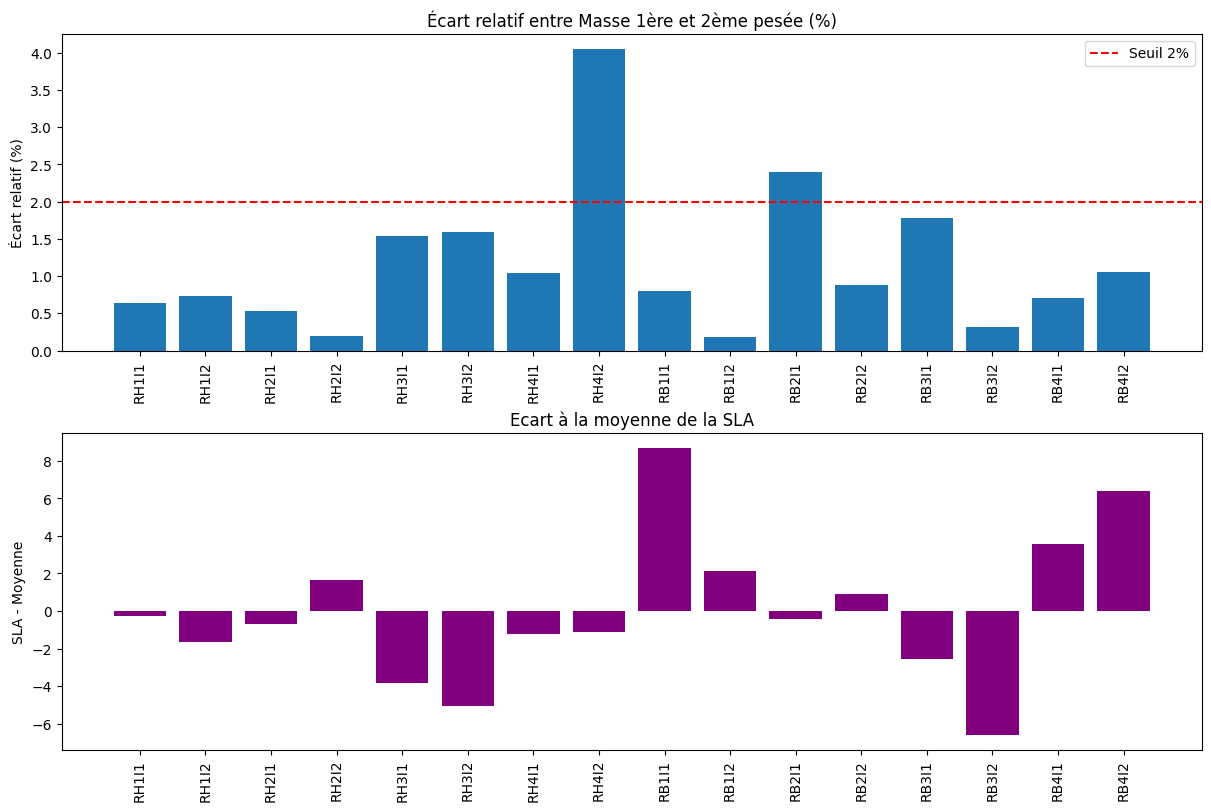

In [207]:
df = pd.read_csv("AVRIL 25 - Prélèvement du 10_04.csv")

#Conversion en flottant pcq y'a des virgules et pas des points
str_to_float = ["Masse 1ère pesée (g)", "Masse 2ème pesée (g)", "Epaisseur (um)"]
for col in str_to_float:
    df[col] = df[col].str.replace(',', '.').astype(float)

#Calcu de l'écart relatif et de la SLA (par unité de disque et non par unité de surface)
taille_disque = 1.077 #en cm²
df['Écart relatif (%)'] = abs(df['Masse 2ème pesée (g)'] - df['Masse 1ère pesée (g)']) / df['Masse 1ère pesée (g)'] * 100
df['SLA'] =  df['Nombre de disque']*taille_disque/df['Masse 2ème pesée (g)']

df["Station"] = ["Rhizo Haut"] * 8 + ["Rhizo Bas"] * 8

#Plot
fig, ax = plt.subplots(2, 1, figsize=(12, 8), constrained_layout=True)

#Plot écart relatif pour vérifier l'évolution de la masse entre la 1ère et la 2ème pesée
ax[0].bar(df['Individu'], df['Écart relatif (%)'])
ax[0].set_title("Écart relatif entre Masse 1ère et 2ème pesée (%)")
ax[0].set_ylabel("Écart relatif (%)")
ax[0].tick_params(axis='x', rotation=90)
ax[0].axhline(y=2, color='red', linestyle='--', label='Seuil 2%')
ax[0].legend()

#Plot SLA pour chaque individu
moyenne_masse_par_disque = df['SLA'].mean()
# Calcul de l'écart à la moyenne
df['Écart à la moyenne'] = df['SLA'] - moyenne_masse_par_disque
#plot de l'écart à la moyenne

ax[1].bar(df['Individu'], df['Écart à la moyenne'], color='purple')
ax[1].set_title("Ecart à la moyenne de la SLA")
ax[1].set_ylabel("SLA - Moyenne")
ax[1].tick_params(axis='x', rotation=90)



C:\Users\arthu\AppData\Local\Temp\ipykernel_6620\94876903.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.drop(group['SLA'].idxmax()).drop(group['SLA'].idxmin()))
C:\Users\arthu\AppData\Local\Temp\ipykernel_6620\94876903.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


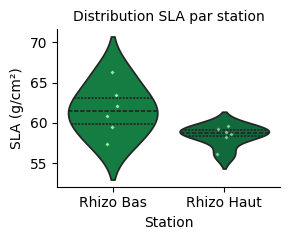

In [205]:
#data pour le violin plot
df_violin = df[['Station', 'SLA']].copy()
df_violin_clean = (
    df_violin
    .groupby("Station", group_keys=False)
    .apply(lambda group: group.drop(group['SLA'].idxmax()).drop(group['SLA'].idxmin()))
)

# Violin plot
fig, ax = plt.subplots(figsize=(3, 2.5))
color_marker = (163/255,247/255,181/255)  
sns.violinplot(
    data=df_violin_clean,
    x='Station',
    y= 'SLA',
    ax=ax,
    inner="quart",
    palette=[colors[0], colors[1]],  
)

# Stripplot Rhizo haut 
sns.stripplot(
    data=df_violin_clean[df_violin_clean["Station"] == 'Rhizo Haut'],
    x='Station',
    y='SLA',
    ax=ax,
    marker='D',
    color=color_marker,  
    size=2,
    alpha=0.7,
    jitter=0.07
)

# Stripplot Rhizo bas 
sns.stripplot(
    data=df_violin_clean[df_violin_clean["Station"] == 'Rhizo Bas'],
    x='Station',
    y='SLA',
    ax=ax,
    marker='D',
    color=color_marker,  
    size=2,
    alpha=0.9,
    jitter=0.07
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Distribution SLA par station", fontsize=10)
ax.set_ylabel("SLA (g/cm²)")
plt.tight_layout()
plt.savefig('SLA_1erCampagne.pdf',dpi=600)

plt.show()
